In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os


In [29]:
#dates of weather information query
start_date_month = '2008-01'
end_date_month = '2018-12'
key= 'R2Yy8grC'
#url structure = https://api.meteostat.net/{VERSION}/{PACKAGE}/{METHOD}?{PARAMETERS}
#https://api.meteostat.net/v1/history/hourly?station=03772&start=2019-05-02&end=2019-05-11&time_zone=Europe/London&time_format=Y-m-d%20H:i&key=XXXXXXXX
#https://api.meteostat.net/v1/history/daily?station=10637&start=2017-01-01&end=2017-12-31&key=XXXXXXXX
#station ids, 22113 - Murmansk, 48698 - Singapore, 94767 - Sydney
station_id = ['22113','48698']
# csv file names
csv=["Murmansk.csv", "Singapore.csv"]
historyparams_monthly ={
    'start':start_date_month,
    'end':end_date_month,
    'key':key
    }
date_ls = [0] * len(station_id)
temp_mean_ls = [0] * len(station_id)
y=0
for i in station_id:
    qry_monthly_url = f'https://api.meteostat.net/v1/history/monthly?station={i}'
    history_monthly = requests.get(qry_monthly_url,params=historyparams_monthly).json()
    # Empty Lists for dates, and mean monthly temperatures
    date_ls[y] = []
    temp_mean_ls[y] = []
    # for loop working through the data to find the mean monthly temperatures, and then appending the lists to fill that data
    for x in range(len(history_monthly["data"])):
        date_ls[y].append(history_monthly['data'][x]['month'])
        temp_mean_ls[y].append(history_monthly['data'][x]['temperature_mean'])
    # Double checking lengths to make sure they are all the same (for 11 years should be 132 months)
    print(f"{len(date_ls[y])},{len(temp_mean_ls[y])}")
    y=y+1



132,132
132,132


In [26]:
temp=[0]* len(station_id)
means=[0]* len(station_id)
dates= [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
for y in range(len(station_id)):
    temp[y]=[]
    means[y]=[]
    for i in range(11):
        begin=11*i
        end=11*(i+1)
        temp[y].append(temp_mean_ls[y][begin:end])
        means[y].append(np.mean(temp[y][i]))
        print(means)
df2 = pd.DataFrame(dates)
y=0
for i in station_id:
    df2[f'tempannual{i}'] = means[y]
    y=y+1
df2

[[1.5272727272727273], 0]
[[1.5272727272727273, 1.4181818181818184], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0.04545454545454594], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0.04545454545454594, 1.2999999999999998], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0.04545454545454594, 1.2999999999999998, 0.3818181818181822], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0.04545454545454594, 1.2999999999999998, 0.3818181818181822, 1.3000000000000005], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0.04545454545454594, 1.2999999999999998, 0.3818181818181822, 1.3000000000000005, 1.3], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0.04545454545454594, 1.2999999999999998, 0.3818181818181822, 1.3000000000000005, 1.3, 1.7909090909090908], 0]
[[1.5272727272727273, 1.4181818181818184, 0.5454545454545457, -0

,0,tempannual22113,tempannual48698
0,2008,1.527273,27.536364
1,2009,1.418182,27.954545
2,2010,0.545455,28.090909
3,2011,-0.045455,27.681818
4,2012,1.300000,27.445455
5,2013,0.381818,27.690909
6,2014,1.300000,27.509091
7,2015,1.300000,27.945455
8,2016,1.790909,28.481818
9,2017,3.427273,28.127273


In [6]:
print(os.getcwd())
df = [0]*len(station_id)
thirtyyearavg = [0]*len(station_id)
y=0
for i in csv:
    data = pd.read_csv(i) 
    df[y] = data.loc[(data["Year"] >= 1970) & (data["Year"] <= 2000)]
    df[y] = df[y].loc[df[y]["T"]!='-',:]
    df[y]["T"] = pd.to_numeric(df[y]["T"])
    thirtyyearavg[y]= np.mean(df[y]["T"])
    y=y+1

In [34]:
y=0
for i in station_id:
    df2[f"Anomaly{i}"]= df2[f"tempannual{i}"]-thirtyyearavg[y]
    y=y+1


In [35]:
df2.columns=["Year","tempannual","anomaly"]
df2

,0,tempannual22113,tempannual48698,Anomaly22113,Anomaly48698
0,2008,1.527273,27.536364,1.295130,0.344056
1,2009,1.418182,27.954545,1.186039,0.762238
2,2010,0.545455,28.090909,0.313312,0.898601
3,2011,-0.045455,27.681818,-0.277597,0.489510
4,2012,1.300000,27.445455,1.067857,0.253147
5,2013,0.381818,27.690909,0.149675,0.498601
6,2014,1.300000,27.509091,1.067857,0.316783
7,2015,1.300000,27.945455,1.067857,0.753147
8,2016,1.790909,28.481818,1.558766,1.289510
9,2017,3.427273,28.127273,3.195130,0.934965


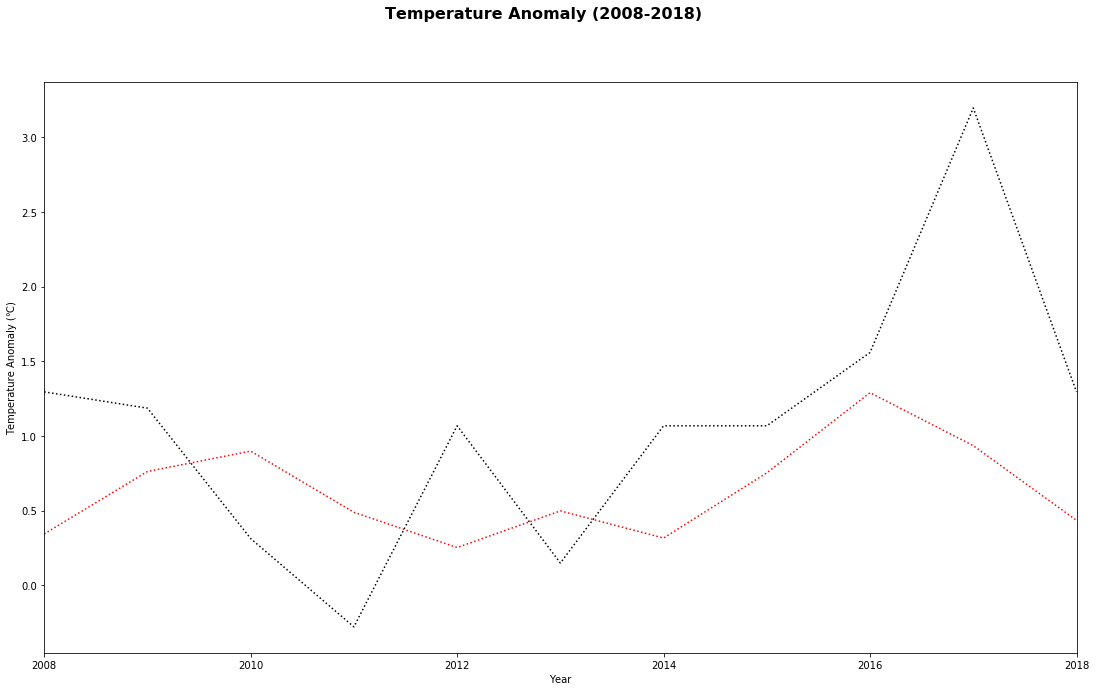

In [45]:
# Plot temperature anomaly data
# You must manually edit the section if there are more axes than 
x = df2[0]
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Temperature Anomaly (2008-2018)", fontsize=16, fontweight="bold")

ax1.set_xlim(min(df2[0]), max(df2[0]))

ax1.plot(x, df2["Anomaly22113"],color="black", 
         linestyle = ":")
ax1.plot(x, df2["Anomaly48698"],color="red", 
         linestyle = ":")
ax1.set_ylabel("Temperature Anomaly (℃)")
ax1.set_xlabel("Year")
plt.savefig("All Temperature Anomaly.png")

In [12]:
data2 = pd.read_csv("Murmansk.csv") 
data2=data2.loc[data2["T"]!='-',:]
data2

,Year,T
10,1959,1.6
11,1960,1
12,1961,1.4
13,1962,-0.1
14,1963,0.2
15,1964,0.6
16,1965,-0.9
17,1966,-2.2
18,1967,1.4
19,1968,-1.4


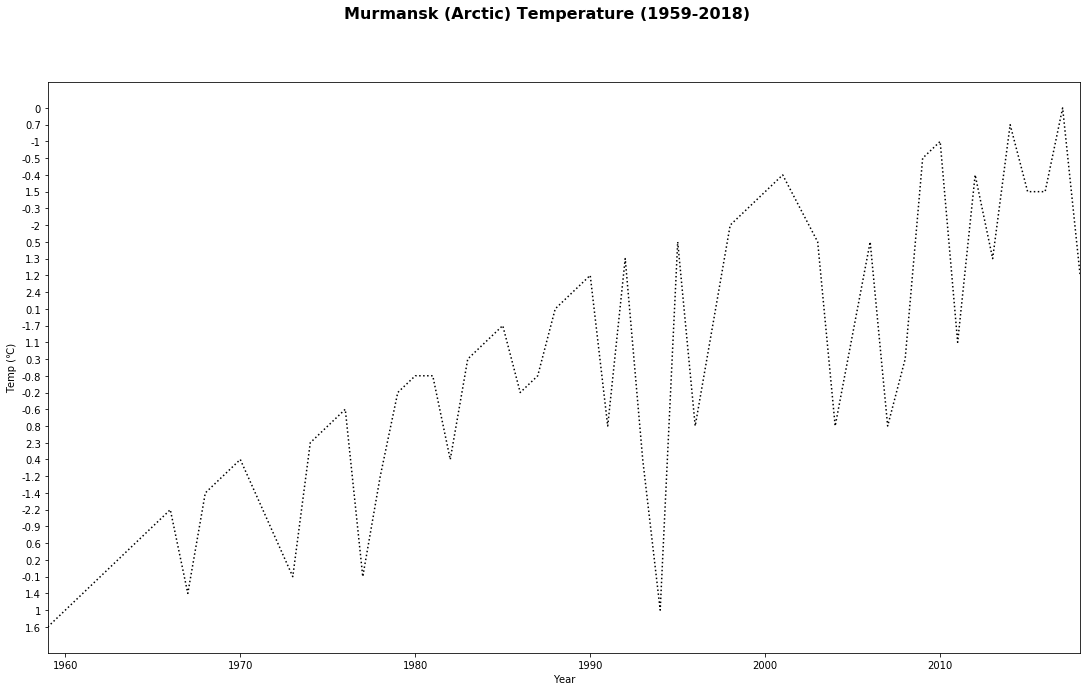

In [13]:
fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Murmansk (Arctic) Temperature (1959-2018)", fontsize=16, fontweight="bold")

ax1.set_xlim(min(data2["Year"]), max(data2["Year"]))
ax1.plot(data2["Year"], data2["T"],color="black", 
         linestyle = ":")



ax1.set_ylabel("Temp (℃)")
ax1.set_xlabel("Year")

# Save the plot

plt.savefig("Murmansk_temperature.png")

IndexError: positional indexers are out-of-bounds

In [ ]:
data.loc["2018","T"]

In [75]:
datacombined= data.merge(dataplus, on="Year", how = "outer")
datacombined.set_index("Year")
datacombined["T"]

,T_x,T_y
Year,,
1955,26.5,NaN
1956,26.2,NaN
1957,26.6,NaN
1958,26.9,NaN
1959,26.7,NaN
1960,26.6,NaN
1961,26.7,NaN
1962,26.4,NaN
1963,26.6,NaN


In [39]:
dataplus

,Year,T
1,1955,26.5
2,1956,26.2
3,1957,26.6
4,1958,26.9
5,1959,26.7
6,1960,26.6
7,1961,26.7
8,1962,26.4
9,1963,26.6
10,1964,26.4


In [92]:
#rename first column to date
df = df.rename(columns={0:'date'})

In [128]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
0,2007-01-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN
1,2007-02-01,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN
2,2007-03-01,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN
3,2007-04-01,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN
4,2007-05-01,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN


In [100]:
df['date'] = pd.to_datetime(df['date'])

In [101]:
x_axis = df['date']

In [102]:
type(df['date'])

pandas.core.series.Series

In [103]:
type(x_axis)

pandas.core.series.Series

In [129]:
y_axis_avgTemp = df['tempMean']
y_axis_avgTempMin = df['tempMeanMin']
y_axis_avgTempMax = df['tempMeanMax']
y_axis_tempMin = df['tempMin']
y_axis_tempMax = df['tempMax']
#y_axis_avgTempMax = df['tempMeanMax']
#y_axis_avgTempMax = df['tempMeanMax']


#y_axis_avgTemp = df['tempMean']
#y_axis_avgTemp = df['tempMean']


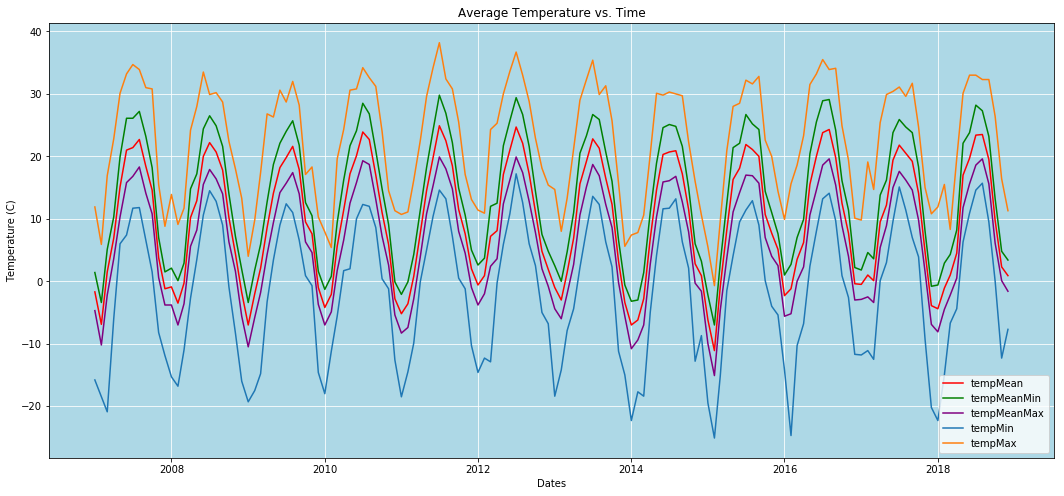

In [137]:
#x_ticks =['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

fig, ax = plt.subplots()


ax.plot(x_axis,y_axis_avgTemp,c='red'm)
ax.plot(x_axis,y_axis_avgTempMin,c='green')
ax.plot(x_axis,y_axis_avgTempMax,c='purple')
ax.plot(x_axis,y_axis_tempMin)
ax.plot(x_axis,y_axis_tempMax)
#ax.plot(x_axis,)
#ax.scatter(x_axis,y_axis,c='red',s=200)
#ax.set_xticks()
#ax.set_xlim('2005','2020')
fig.set_figheight(8)
fig.set_figwidth(18)
ax.set_title('Average Temperature vs. Time')
ax.set_xlabel('Dates')
ax.set_ylabel('Temperature (C)')
ax.set_facecolor('lightblue')
ax.grid(color='white')
ax.legend()


plt.savefig(os.path.join(f'Test.png'))
#plt.show()

In [ ]:
#ROUGH CODE FOLLOWS

In [ ]:
cityparams ={
    'q':city,
    'key':key
    }

qry_url_city = 'https://api.meteostat.net/v1/stations/search?'

countryparams={
    'country':country,
    'key':key   
    }
#response_country = requests.get(qry_url_country).json()
qry_url_country = 'https://api.meteostat.net/v1/stations/search?q=CA'

#response_country = requests.get(qry_url_country).json()
test_url = f'https://api.meteostat.net/v1/stations/search?q={city}&key={key}'

In [ ]:


#for index, row in staging_df.iterrows():
#    stationid = row['station_id']
#    stationidparams={
#    'start':start_date,
#    'end':end_date,
#    'key':key
#    }
#    print(f'Processing Record {index} set of | {stationid}')
#    response = requests.get(qry_history_url,params=stationidparams).json()
    
    #try:
    #    staging_df['meta_source'] = history['meta']['source']
    #except:KeyError
    #    print('missing values, i am going to skip it')
    #    print('====================================')


In [ ]:
csv.head()

In [ ]:
# #station id
# station_df = csv['stationid']

# #reset index for dataframe
# station_df = station_df.reset_index()

# station_df.head()

In [ ]:
#stationid = row['stationid']

#station

stationidparams={
    'start':start_date,
    'end':end_date,
    'key':key
    }
    #print(f'Processing Record {index} set of | {stationid}')
response = requests.get(qry_history_url,params=stationidparams).json()

In [ ]:
stationid = station_df['stationid']

In [ ]:
station_df['stationid']

In [ ]:
#city_df.loc[index,'Cloudiness']=response['clouds']['all']

for index, row in staging_df.iterrows():
    try:
        station_id = row['stationid']
        print(station_id)
    except:
        print('Type error, i am going to skip it')
        print('==================================')
    #qry_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
    #stationidparams={
    #'start':start_date,
    #'end':end_date,
    #'key':key
    #}
    #print(f'Processing Record {index} set of | {station_id}')
    #response = requests.get(qry_url,params=stationidparams).json()
    #staging_df.loc[index,'meta_source'] = response['meta']['source']
    #except:KeyError
    #try:
        
        #print('missing values, i am going to skip it')
        #print('====================================')

In [ ]:
station_id